In [1]:

#3rd Part & Standard Library
import numpy as np
import math

#Internal Library
from SimpleJzAzBz import ColorConverter

#Creation of ColorConverter Class
cc = ColorConverter()


In [12]:
#let's get a sample set of JzAzBz colors in an equal rotation 
# around the Hz (hue axis)

#Start with point for color rotation and a number of samples wanted
kinda_red_rgb = np.array([[217.0, 85.0, 45.0]])
n_sample = 100

xyz_d65 = cc.srgb_2_xyz65(kinda_red_rgb)
jzazbz = cc.xyz65_2_jzazbz(xyz_d65)
jzczhz = cc.jzazbz_2_jzczhz(jzazbz)

print(jzczhz)
print('Hue Angle = ', jzczhz[:,2]*180/np.pi)

#time to sweep one degree in hue angle and generate the jzczhz set for that.

#converting arctan to angle in degrees
hue_angle = jzczhz[:,2]*180/np.pi

#creating 365 samples for each degree
ha_space = np.linspace(hue_angle, hue_angle+365, num=n_sample)

#filling empty array space with the values of jz,cz
jz_space = np.full((n_sample,1), jzczhz[:,0])
cz_space = np.full((n_sample,1), jzczhz[:,1])

#aggregating array
jzczhz_sample = np.array([jz_space[:,0], cz_space[:,0], ha_space[:,0]]).T

#converting angle back to hz
jzczhz_sample[:,2] = jzczhz_sample[:,2] * np.pi/180

#convert samples back into jzazbz
jzazbz_sample = cc.jzczhz_2_jzazbz(jzczhz_sample)

#JzazBz to XYZ65
xyz65_sample = cc.jzazbz_2_xyz65(jzazbz_sample)

#Xyz65 to sRGB
sRGB_sample = cc.xyz65_2_srgb(xyz65_sample)


[[0.01099562 0.01044424 0.91320062]]
Hue Angle =  [52.3225414]


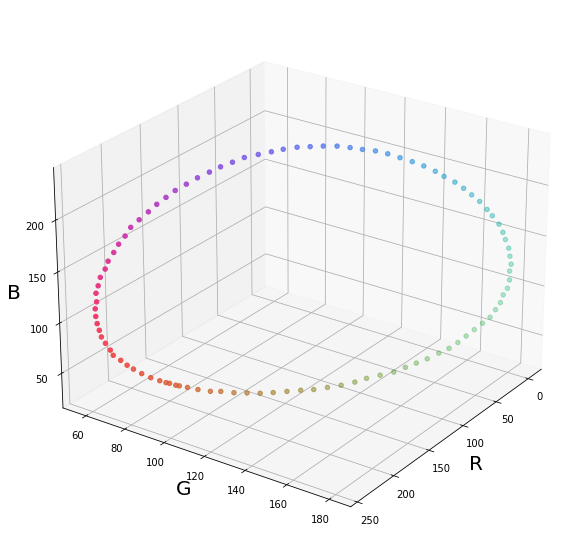

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')

ax.set_xlabel('R', fontsize=20)
ax.set_ylabel('G', fontsize=20)
ax.set_zlabel('B', fontsize=20)


r = sRGB_sample[:,0]
g = sRGB_sample[:,1]
b = sRGB_sample[:,2]
c = np.abs(sRGB_sample/255)

ax.view_init(25, 35)
ax.scatter(r,g,b, c=c)